# GeoPandas Intro

https://geohackweek.github.io/vector/04-geopandas-intro/


In [2]:
import folium
from IPython.display import display
import geopandas
from shapely.geometry import mapping
%matplotlib inline

In [3]:
cells=[(15,-40), (16,-40)]

In [4]:
shapes = []
from shapely.geometry import Polygon
for cell in cells:
    llxy = [i * 100000 for i in cell]
    lrxy = (llxy[0] + 100000, llxy[1])
    ulxy = (llxy[0], llxy[1] + 100000)
    urxy = (lrxy[0], ulxy[1])
    shapes.append(Polygon([(ulxy), (urxy), (lrxy), (llxy)]))

In [5]:
gdf = geopandas.GeoDataFrame(crs={'init': 'epsg:3577', 'no_defs': True}, geometry=shapes)
gdf_project = gdf.to_crs(epsg=4326)
geojson = gdf_project.to_json()
bounds = gdf_project.total_bounds
shp = mapping(Polygon([(bounds[0], bounds[-1]),
                       (bounds[2], bounds[-1]),
                       (bounds[2], bounds[1]),
                       (bounds[0], bounds[1])]))

In [6]:
style_function = lambda x: {'fillColor': '#0000ff' if x['type'] == 'Polygon' else '#00ff00'}
mapa = folium.Map(location=[-30,150], zoom_start=4)
polygons = folium.features.GeoJson(geojson)
poly = folium.features.GeoJson(shp, style_function=style_function)
mapa.add_children(polygons)
mapa.add_children(poly)
display(mapa)

/g/data1/ha3/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
/g/data1/ha3/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [7]:
import pandas as pd
data = [
        {'some_attribute': 'abc', 'lat': '50.1234', 'lon': '10.4023'},
        {'some_attribute': 'def', 'lat': '40.5678', 'lon': '8.3365'},
        {'some_attribute': 'ghi', 'lat': '60.9012', 'lon': '6.2541'},
        {'some_attribute': 'jkl', 'lat': '45.3456', 'lon': '12.5478'},
        {'some_attribute': 'mno', 'lat': '35.7890', 'lon': '14.3957'},
        ]

df = pd.DataFrame(data)
print(df)

       lat      lon some_attribute
0  50.1234  10.4023            abc
1  40.5678   8.3365            def
2  60.9012   6.2541            ghi
3  45.3456  12.5478            jkl
4  35.7890  14.3957            mno


In [8]:
# to see the funciton params:  df.to_csv?
df.to_csv('my_csv1.csv'); df.to_csv('my_csv1.csv', mode='a', header=False)  #defaut mode='w' and header=Trure

# now do this run 
df.to_csv('my_csv2header.csv'); df.to_csv('my_csv2header.csv', mode='a')  # header repeated


In [9]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
df['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

In [10]:
import geopandas
df = geopandas.GeoDataFrame(df, geometry='geometry')

In [11]:
df.to_file('MyGeometries.shp', driver='ESRI Shapefile')

In [13]:
df.geometry.crs

In [14]:
import geopandas
df = geopandas.GeoDataFrame(df, geometry='geometry')

# proj WGS84

df.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

df.to_file('MyGeometries2.shp', driver='ESRI Shapefile')

In [15]:
df.geometry.crs

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

## https://geohackweek.github.io/vector/04-geopandas-intro/

OR

## http://nbviewer.jupyter.org/github/geohackweek/vector/blob/gh-pages/docker/notebooks/geopandas_intro.ipynb
Like shapely, these spatial data types are limited to discrete entities/features and do not address continuously varying rasters or fields.

While GeoPandas spatial objects can be assigned a Coordinate Reference System (CRS), operations can not be performed across CRS’s. Plus, geodetic (“unprojected”, lat-lon) CRS are not handled in a special way; the area of a geodetic polygon will be in degrees.


In [16]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from matplotlib
# import seaborn as sns
# plt.style.use('bmh')

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

data_pth = "../data"
from shapely.wkt import loads

GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')])

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

In [17]:
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [18]:
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

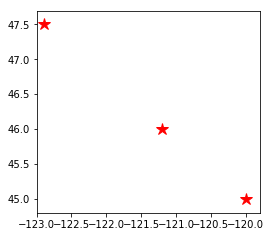

In [19]:
gs.plot(marker='*', color='red', markersize=12, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

In [20]:
#The plot method accepts standard matplotlib.pyplot style options, and can be tweaked like any other matplotlib figure.
gs.crs = {'init': 'epsg:4326'}

In [21]:
gs.centroid

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [22]:
data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [23]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

In [24]:
gs = GeoSeries(geometry, index=data['name'])
gs

a        POINT (-120 45)
b      POINT (-121.2 46)
c    POINT (-122.9 47.5)
dtype: object

In [25]:
df = pd.DataFrame(data)  # create a pd dataframe from a dictionary
df

,lat,lon,name
0,45.0,-120.0,a
1,46.0,-121.2,b
2,47.5,-122.9,c


In [26]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

In [27]:
gdf

,lat,lon,name,geometry
0,45.0,-120.0,a,POINT (-120 45)
1,46.0,-121.2,b,POINT (-121.2 46)
2,47.5,-122.9,c,POINT (-122.9 47.5)


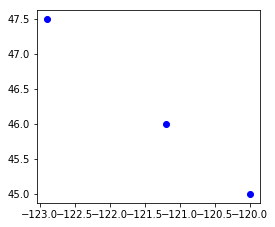

In [28]:
gdf.plot(marker='o', color='blue', markersize=6, figsize=(4, 4));

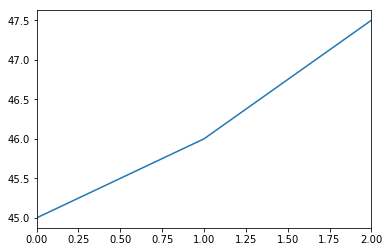

In [29]:
df['lat'].plot()

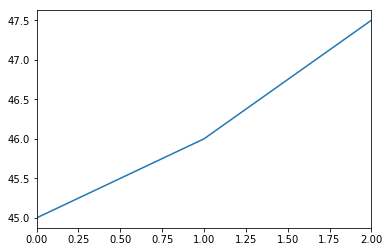

In [30]:
gdf['lat'].plot()

In [31]:
gdf.iloc[-1]  # last row or feature

lat                        47.5
lon                      -122.9
name                          c
geometry    POINT (-122.9 47.5)
Name: 2, dtype: object

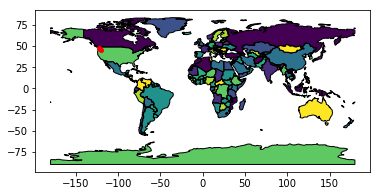

In [32]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(alpha=1), figsize=(10, 6),
             marker='o', color='red', markersize=4);

# Reading from other data source types; fancier plotting
Read from remote PostgreSQL/PostGIS database and from an OGC WFS service.

Read PostgreSQL/PostGIS dataset from the Amazon Cloud
Though the fact that it's on an Amazon Cloud is fairly irrelevant. It could be on a UW server, or on your local computer. The approach is identical.

In [34]:
import requests
import geojson

wfs_url = "http://data.nanoos.org/geoserver/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='oa:goaoninv', outputFormat='json')

r = requests.get(wfs_url, params=params)
wfs_geo = geojson.loads(r.content)

In [35]:
print(type(wfs_geo))
print(wfs_geo.keys())
print(len(wfs_geo.__geo_interface__['features']))

<class 'geojson.feature.FeatureCollection'>
[u'crs', u'totalFeatures', u'type', 'features']
529


In [36]:
wfs_gdf = GeoDataFrame.from_features(wfs_geo.__geo_interface__['features'])

wfs_gdf.iloc[-1]

Oceans                                                     North Pacific Ocean
Source_Doc_kml                                                            None
additional_organizations     Fanny Bay Oysters; University of Alaska Fairba...
agency                                                         Tula Foundation
city                                                                          
comments                                                                      
comments_about_overlaps                                                       
contact_email                                            wiley.evans@hakai.org
contact_name                                                       Wiley Evans
country                                                                 Canada
cruise_id                                                                  NaN
data_url                                                                      
department                                          

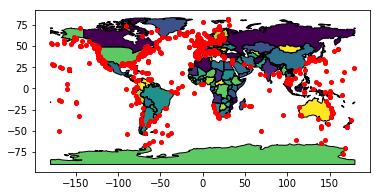

In [37]:
wfs_gdf.plot(ax=world.plot(alpha=1), figsize=(10, 6),
             marker='o', color='red', markersize=4);